# Regressão Linear: Uma variável explicativa

Uma empresa está interessada em verificar se a remuneração dos seus colaboradores está de acordo com as políticas vigentes. Para isso coletou uma amostra de 46 colaboradores.

__Pergunta de Negócio__:
O salário muda de acordo com os anos de educação superior? Se sim, é possível construir um modelo que  estime o salário de acordo com esses anos?

## Importação das bibliotecas

In [1]:
# Pacotes de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
import statsmodels.api as sm

## Importação da base de dados

In [2]:
df = pd.read_csv('base_funcionarios_v1.csv',
                 sep=';', 
                 index_col='id')
df.shape

(46, 2)

In [3]:
df.head()

,Salario,Anos_Educ_Superior
id,,
1,5517.4,3
2,6399.9,4
3,6206.7,6
4,6060.6,4
5,6122.7,2


In [4]:
df.dtypes

Salario               float64
Anos_Educ_Superior      int64
dtype: object

## Análise Exploratória dos Dados

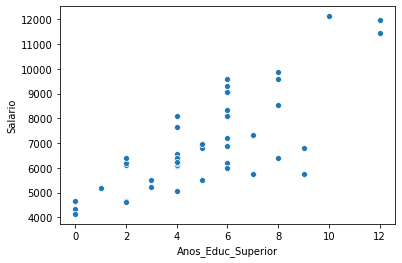

In [5]:
# Gráfico de Dispersão
sns.scatterplot(x=df['Anos_Educ_Superior'],
                y=df['Salario']);

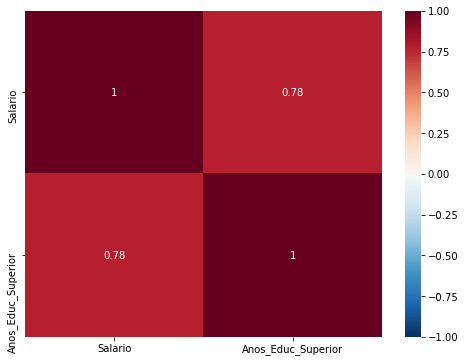

In [6]:
# Correlação Linear de Pearson
fig = plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), 
            cmap='RdBu_r', 
            vmin=-1, vmax=1, 
            annot=True);

## Ajuste do Modelo de Regressão usando a biblioteca Statsmodels

In [7]:
# Variável resposta
y = df['Salario']

# Variável explicativa
df['intercepto'] = 1 
x = df[['intercepto',
        'Anos_Educ_Superior']]

In [8]:
# Ajuste do Modelo
modelo = sm.OLS(y,x)
resultado = modelo.fit()

In [9]:
# Resultado do ajuste
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     67.03
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           2.18e-10
Time:                        09:37:01   Log-Likelihood:                -391.36
No. Observations:                  46   AIC:                             786.7
Df Residuals:                      44   BIC:                             790.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4301.7990    372

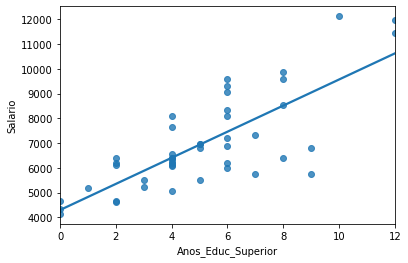

In [10]:
# Gráfico de dispersão com a reta de regressão linear
sns.regplot(x=df['Anos_Educ_Superior'],
            y=df['Salario'], ci=None);

### Interpretação dos Coeficientes

**Intercepto ou $\beta_0$**: Salário médio de um colaborador sem educação superior é de `R$4.301,80`.<br>
**$\beta_1$** x Anos de Educação Superior: Cada ano adicional de educação superior gera um aumento médio de `R$526,73`.<br>